# Problem 4.3 in Applied Groundwater Modeling 2015 

The town of Hubbertville is planning to expand its water supply by constructing a well in an
unconfined aquifer consisting of sand and gravel (see Figure 1). The well is designed to pump
constantly at a rate of 20,000 m3/day. Well construction was halted by the State Fish and Game
Service, managers of the Green Swamp Conservation area. The state claimed the pumping would
“significantly reduce” the groundwater discharge to the swamp and damage waterfowl habitat.
The town claimed that the river and the groundwater divide located somewhere near the center of
the valley would prevent any change in flow to the swamp. 

### Part A 
Construct a steady-state model of the area between the river and swamp prior to pumping using the
information provided in Figure 1. The initial head is uniformly at 1000 m above sea level (the
datum of the aquifer is 980 m above sea level, see Fig. 1). Produce a contour map of head
distribution and a north-south water table profile. Label the groundwater divide simulated between
the river and the swamp. 

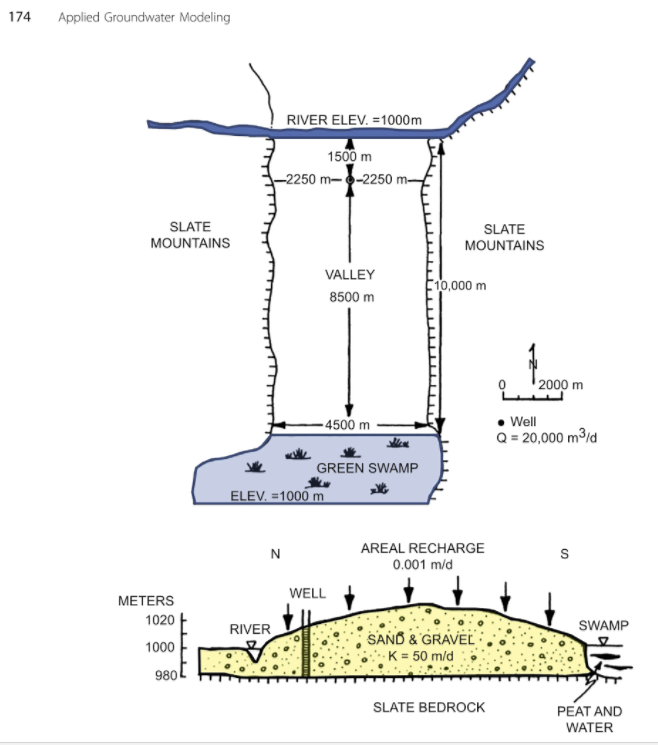

first 

# Import packages like matplotlib and numpy

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
%matplotlib inline


In [2]:
# set up model domain paremters
Lx = 4500 +500 + 500
Ly = 10000+500 + 500
delc = 500
delr = 500
nrow = int(Ly / delc)
ncol = int(Lx / delr)
print(nrow,ncol)
nlay = 1
botm = 980
nper = 10
perlen = [365.25]
steady = [True]
for sp in range(nper-1):
    perlen.append(365.25)
    steady.append(False)

22 11


# Here we are building the topography of the model, normally we would have some sort of Digital Elevation Model (DEM) to work with but for now we will use numpy to create our own 

[ 1000.  1002.  1004.  1006.  1008.  1010.  1012.  1014.  1016.  1018.
  1020.  1020.  1018.  1016.  1014.  1012.  1010.  1008.  1006.  1004.
  1002.  1000.]


/Users/rosskushnereit/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
/Users/rosskushnereit/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,1,'Landsurface Elevation (meters)')

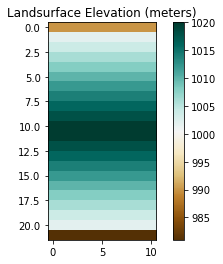

In [3]:

North_2_South = np.linspace(1000,1020,(nrow/2))
South_2_North = np.linspace(1020,1000,(nrow/2))
arr = np.append(North_2_South,South_2_North)
print(arr)
top = np.zeros((nrow,ncol))
for c in range(ncol):
    top[:,c] = arr
top[0,:] = 10 + botm
top[nrow-1,:] = 1 +botm
fig,ax = plt.subplots()
plt.imshow(top,cmap = 'BrBG')
plt.colorbar()
plt.rcParams['figure.figsize'] = (20, 12)
plt.title('Landsurface Elevation (meters)')

# Notice this is "similar" to the top of the image provided by the text book. 

## Now we will import flopy and make sure modflow is going to work on your machine.

In [14]:
import flopy
import os

workspace = os.path.join('Hubbertville_dir') # this is the folder where all the data will be sent from the model.
if not os.path.exists(workspace):
    os.mkdir(workspace)
import platform
print(platform.system())

print(os.name)
if platform.system() == 'Windows':
    exe = os.path.join('gw_codes','MODFLOW-NWT.exe')
elif platform.system() == 'Darwin': # Mac
#     exe = os.path.join('gw_codes','./mfnwt') #'./mfnwt')
    exe = os.path.join('gw_codes','mfnwt')
    exe = os.path.join('/','Users','rosskushnereit','Desktop','babies_first_gw_model','gw_codes','mfnwt')
if not os.path.exists(exe):
    print('You messed up')


Darwin
posix


# Now the fun part! Modflow with flopy!

Lets call our modflow file Hubbertville_example, the .nam file will be written into the workspace folder we set up before. 

In [15]:
mf = flopy.modflow.Modflow('Hubbertville_example',version='mfnwt',exe_name=exe,model_ws = workspace)
print(mf.exe_name)


/Users/rosskushnereit/Desktop/babies_first_gw_model/gw_codes/mfnwt


# Now we will make the dis package, this includes all of model domain parameters we set up in the earlier blocks of code

This includes things like the number of layers, rows, columns, and the time parameters.

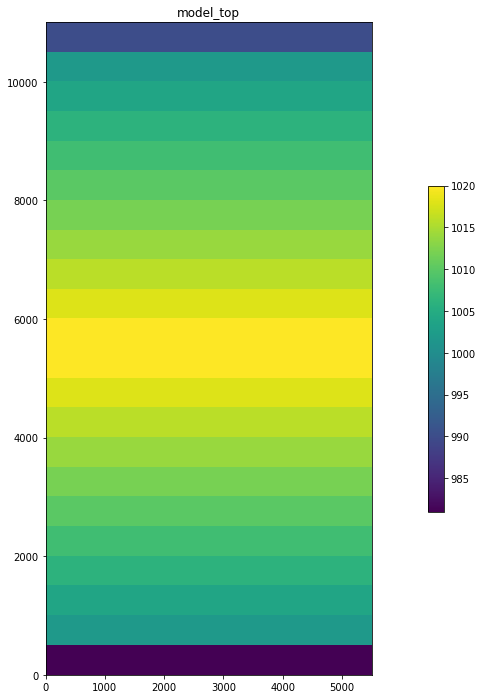

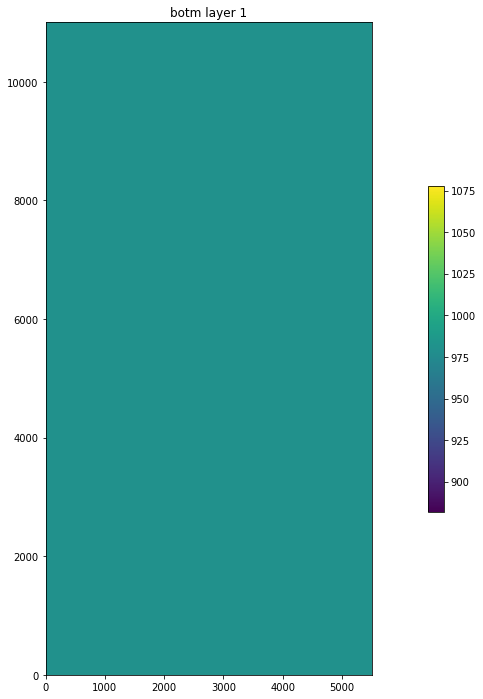

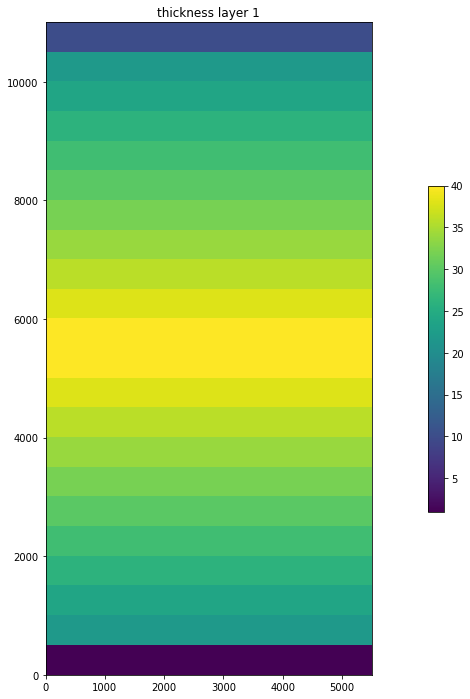

In [16]:
dis = flopy.modflow.ModflowDis(mf, nlay, nrow, ncol, nper, delr, delc, 
                                     top = top, botm = botm, perlen=perlen,steady=steady)
dis.plot()

# Now here is the bas package, this is the how we set up which cells are activated or not

### Activated cells are 1 and non activated cells are 0 in the ibound array

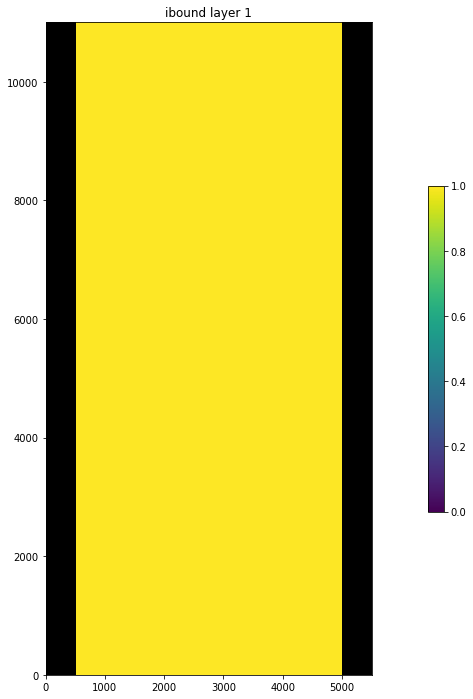

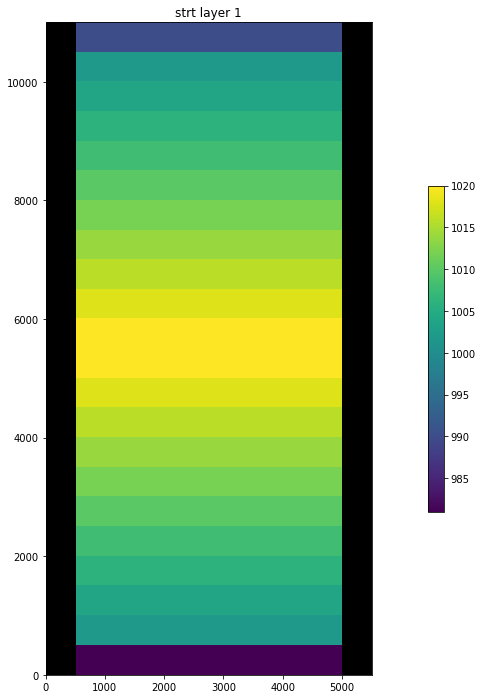

In [17]:
ibound = np.ones((nrow,ncol))
ibound[:,0] = 0
ibound[:,ncol-1] = 0
bas = flopy.modflow.ModflowBas(mf,ibound = ibound,strt=top)
bas.plot()

## This is how we will set up the ghb package (general head boundaries)

This is a little more advanced for knew users but we are just making the head steady at 1000 to the left and to the right of the model. 


In [18]:
cond = 1000
stagenorth = 1000.
stagesouth = 1000.
bound_sp1 = []
for il in range(nlay):
    condleft = 5#hk * (stagenorth - zbot) * delc
    condright = cond#hk * (stagesouth - zbot) * delc
    for ic in range(ncol):
        bound_sp1.append([il, 0, ic, stagenorth, condleft])
        bound_sp1.append([il, nrow-1, ic, stagesouth, condright])

stress_period_data = {0:bound_sp1}
print(stress_period_data)

{0: [[0, 0, 0, 1000.0, 5], [0, 21, 0, 1000.0, 1000], [0, 0, 1, 1000.0, 5], [0, 21, 1, 1000.0, 1000], [0, 0, 2, 1000.0, 5], [0, 21, 2, 1000.0, 1000], [0, 0, 3, 1000.0, 5], [0, 21, 3, 1000.0, 1000], [0, 0, 4, 1000.0, 5], [0, 21, 4, 1000.0, 1000], [0, 0, 5, 1000.0, 5], [0, 21, 5, 1000.0, 1000], [0, 0, 6, 1000.0, 5], [0, 21, 6, 1000.0, 1000], [0, 0, 7, 1000.0, 5], [0, 21, 7, 1000.0, 1000], [0, 0, 8, 1000.0, 5], [0, 21, 8, 1000.0, 1000], [0, 0, 9, 1000.0, 5], [0, 21, 9, 1000.0, 1000], [0, 0, 10, 1000.0, 5], [0, 21, 10, 1000.0, 1000]]}


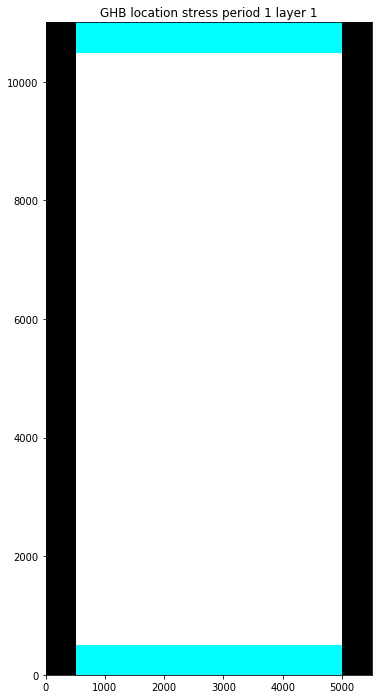

In [19]:
ghb = flopy.modflow.ModflowGhb(mf,stress_period_data=stress_period_data)
ghb.plot()

# The output control which is for post proccessing

In [20]:
# Output control
spd = {(0, 0): ['print head', 'save head', 'print budget', 'save budget']}
oc = flopy.modflow.ModflowOc(mf, stress_period_data=spd)

# Now for the upw package, this includes things like sy, hk, and more

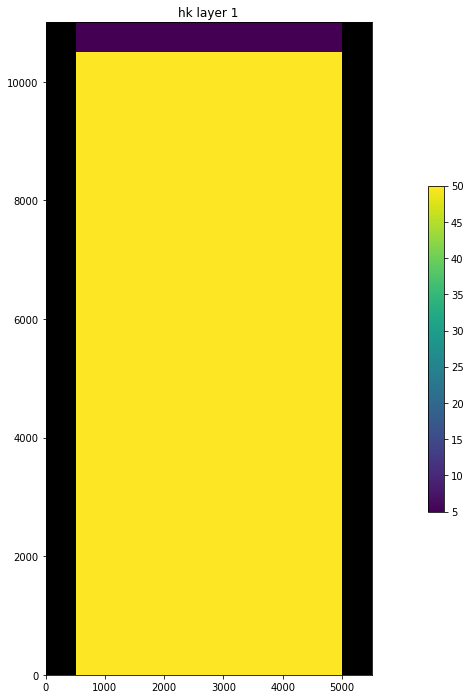

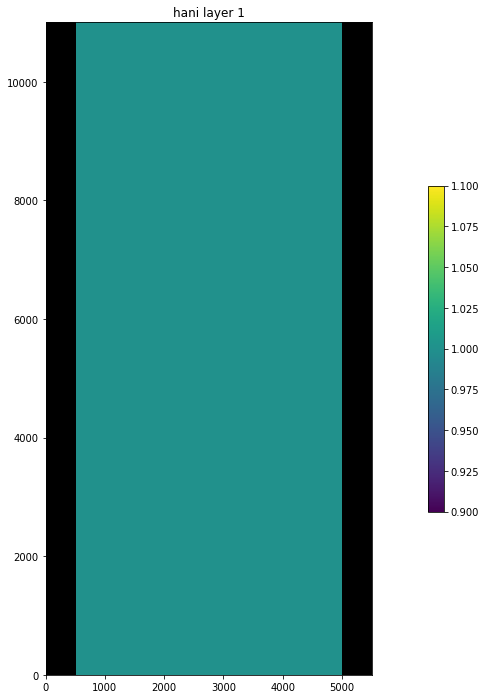

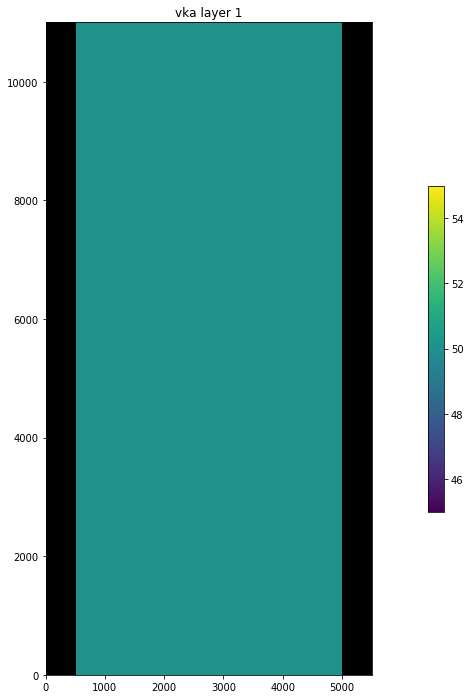

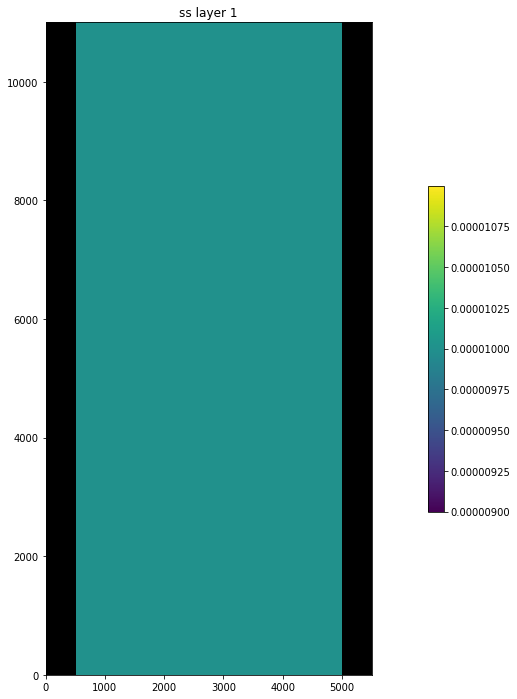

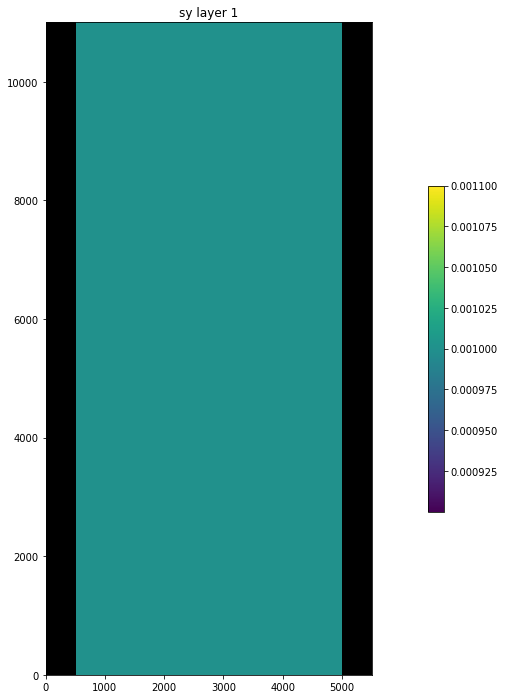

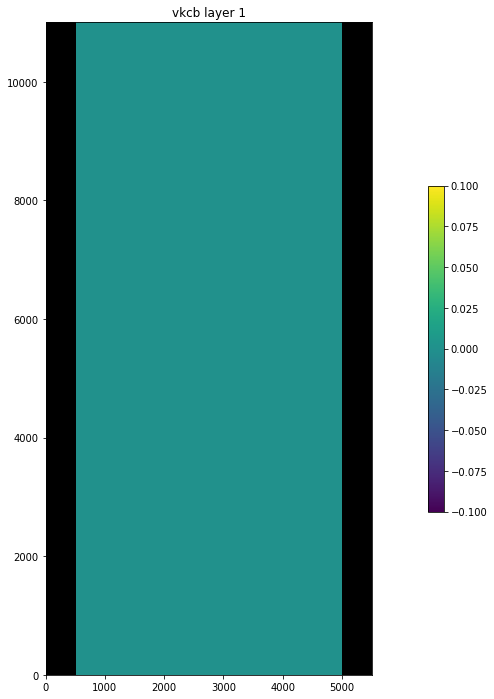

In [21]:
hk = 50. # meters/day
hk = np.ones((nrow,ncol)) * 50
hk[0,:] = 5

vka = 50.
sy = .001
laytyp = 1
upw = flopy.modflow.ModflowUpw(mf, hk=hk, vka=vka, sy=sy, laytyp=laytyp)
upw.plot()

# Now to set up modflow nwt, this is how the groundwater equation will be calculated

In [22]:
nwt = flopy.modflow.ModflowNwt(mf)


In [23]:
# Write the model input files
mf.write_input()

# Run the model
success, mfoutput = mf.run_model(silent=False, pause=False)
if not success:
    raise Exception('MODFLOW did not terminate normally.')



FloPy is using the following executable to run the model: /Users/rosskushnereit/Desktop/babies_first_gw_model/gw_codes/mfnwt

                                  MODFLOW-NWT-SWR1 
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUNDWATER-FLOW MODEL
                             WITH NEWTON FORMULATION
                             Version 1.1.3, 8/01/2017                        
                    BASED ON MODFLOW-2005 Version 1.11.0 08/08/2013                       

                    SWR1 Version 1.04.0 09/15/2016                       

 Using NAME file: Hubbertville_example.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2018/02/10 20:29:58

 Solving:  Stress period:     1    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:     2    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:     3    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:     4    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:  

In [24]:
# success, buff = mf.run_model()

In [25]:
# Now that the model has ran, lets plot the heads for the first stress period
import flopy.utils.binaryfile as bf

headobj =  bf.HeadFile(os.path.join(workspace,'Hubbertville_example.hds'))
print(headobj.get_times())
print(headobj.get_kstpkper())

head = headobj.get_data((0,2))

[365.25, 730.5, 1095.75, 1461.0, 1826.25, 2191.5, 2556.75, 2922.0, 3287.25, 3652.5]
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9)]


In [26]:
# Setup contour parameters
levels = np.arange(1, 10, 1)
levels = np.arange(980,1020,2)
extent = (delr/2., Lx - delr/2., delc/2., Ly - delc/2.)
print('Levels: ', levels)
print('Extent: ', extent)

Levels:  [ 980  982  984  986  988  990  992  994  996  998 1000 1002 1004 1006 1008
 1010 1012 1014 1016 1018]
Extent:  (250.0, 5250.0, 250.0, 10750.0)


<a list of 2 text.Text objects>

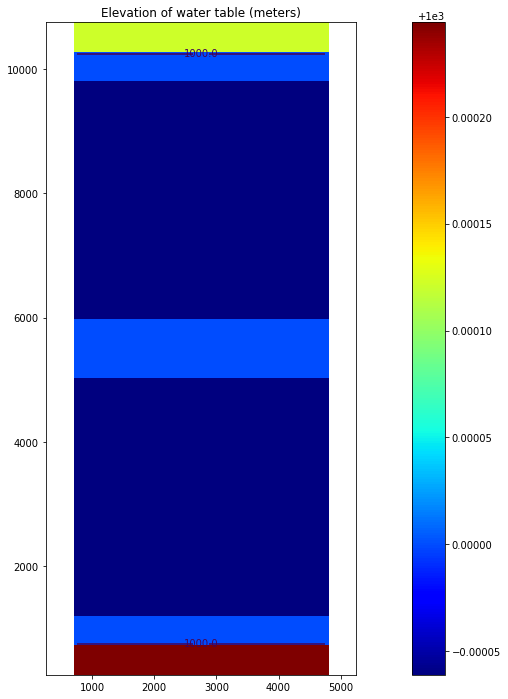

In [28]:
head = headobj.get_data((0,0))

fig,ax = plt.subplots()
head[0][ibound == 0] = np.nan
plt.imshow(head[0],cmap='jet',extent=extent)#,vmin = 980,vmax =1020)
plt.colorbar()
plt.title('Elevation of water table (meters)')
CS = plt.contour(np.flipud(head[0, :, :]), levels=levels, extent=extent,zorder=10)
plt.clabel(CS, inline=1, fontsize=10, fmt='%1.1f', zorder=11)

In [29]:
# Create the well package
# Remember to use zero-based layer, row, column indices!

# wpt = ((float(ncol/2)-0.5)*delr, (float(nrow/2-1)+0.5)*delc)
# # wpt = (450., 550.)
# print(wpt)

wpt = ((2250 + 500),(500+1500)) #x,y
wr,wc = wpt[1]/delr,wpt[0]/delc
print(wpt)
print(wr,wc)

pumping_rate = -20000 # m^3/day
wel_sp1 = [[0, wr, wc, 0.]]
wel_sp2 = [[0, wr, wc, pumping_rate]]
wel_sp3 = [[0, wr, wc, pumping_rate]]
stress_period_data = {0: wel_sp1, 1: wel_sp2, 2: wel_sp3}
wel = flopy.modflow.ModflowWel(mf, stress_period_data=stress_period_data)

(2750, 2000)
4.0 5.5


In [30]:
# Write the model input files
mf.write_input()

# Run the model
success, mfoutput = mf.run_model()# mf.run_model(silent=True, pause=False, report=True)
if not success:
    raise Exception('MODFLOW did not terminate normally.')

FloPy is using the following executable to run the model: /Users/rosskushnereit/Desktop/babies_first_gw_model/gw_codes/mfnwt

                                  MODFLOW-NWT-SWR1 
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUNDWATER-FLOW MODEL
                             WITH NEWTON FORMULATION
                             Version 1.1.3, 8/01/2017                        
                    BASED ON MODFLOW-2005 Version 1.11.0 08/08/2013                       

                    SWR1 Version 1.04.0 09/15/2016                       

 Using NAME file: Hubbertville_example.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2018/02/10 20:30:24

 Solving:  Stress period:     1    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:     2    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:     3    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:     4    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:  

<a list of 10 text.Text objects>

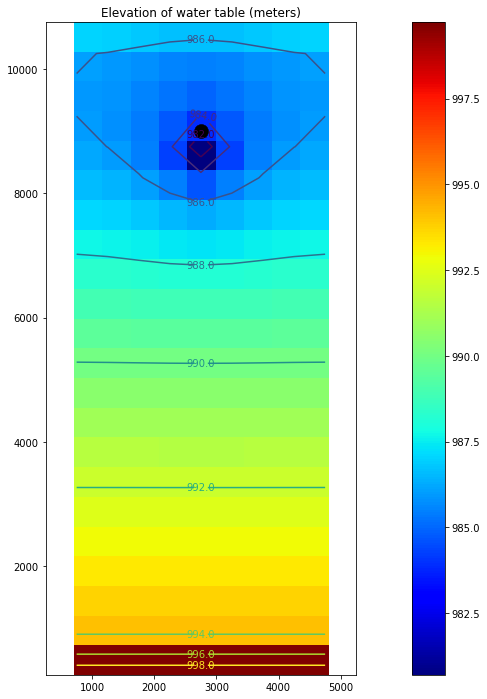

In [31]:
head = headobj.get_data((0,9))

fig,ax = plt.subplots()
head[0][ibound == 0] = np.nan
# head[0][head[0]<botm] = np.nan
plt.imshow(head[0],cmap='jet',extent=extent)#,vmin = 980,vmax =1020)
plt.colorbar()
plt.plot((2250 + 500),(500+8500),lw=0, marker='o', markersize=14,markeredgewidth=0.5,markeredgecolor='black',markerfacecolor='k')
plt.title('Elevation of water table (meters)')
CS = plt.contour(np.flipud(head[0, :, :]), levels=levels, extent=extent,zorder=10)
plt.clabel(CS, inline=1, fontsize=10, fmt='%1.1f', zorder=11)